# **Cindy Chen**
# **QMSS 5073 - Machine Learning**
# **Assignment #2**

In [206]:
#packages to import
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np

In [207]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Part 1: Regression on California Test Scores

In [208]:
dataset = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Caschool.csv", index_col = 0) #set the first column as the index column
dataset.columns #view what variables are in my data

Index(['distcod', 'county', 'district', 'grspan', 'enrltot', 'teachers',
       'calwpct', 'mealpct', 'computer', 'testscr', 'compstu', 'expnstu',
       'str', 'avginc', 'elpct', 'readscr', 'mathscr'],
      dtype='object')

Since I cannot use the variables "readscr" and "mathscr" in my analysis, I will simply remove them from my data set at the onset.

In [209]:
dataset2 = dataset.iloc[:, 0:15] #remove the testscr, readscr, and mathscr columns
dataset2.columns

Index(['distcod', 'county', 'district', 'grspan', 'enrltot', 'teachers',
       'calwpct', 'mealpct', 'computer', 'testscr', 'compstu', 'expnstu',
       'str', 'avginc', 'elpct'],
      dtype='object')

In [210]:
dataset2.head(10) #understand what my data looks like

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677
6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759
7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949
8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461
9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157
10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921


## **1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.**

Distribution of Average Test Score

(array([ 5., 23., 49., 71., 79., 83., 59., 31., 13.,  7.]),
 array([605.55004883, 615.67004395, 625.79003906, 635.91003418,
        646.0300293 , 656.15002441, 666.27001953, 676.39001465,
        686.51000977, 696.63000488, 706.75      ]),
 <a list of 10 Patch objects>)

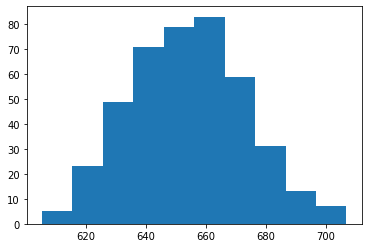

In [211]:
mpl.hist(dataset2['testscr'])

Distribution of Student-Teacher Ratio 'str' (variable 1 that I think is likely to have a relationship with average test score). This is because smaller ratios allow teachers to spend more time per student, enabling them to perform better on tests.



(array([  5.,  14.,  30.,  68., 109., 110.,  51.,  24.,   4.,   5.]),
 array([14.        , 15.17999992, 16.35999985, 17.53999977, 18.71999969,
        19.89999962, 21.07999954, 22.25999947, 23.43999939, 24.61999931,
        25.79999924]),
 <a list of 10 Patch objects>)

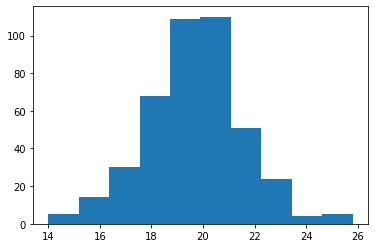

In [212]:
mpl.hist(dataset2['str'])

Distribution of District Average Income 'avginc' (variable 2 that I think is likely to have a relationship with average test score).  I believe that income of the school district contributes to the school's funding and resources.


(array([ 90., 179.,  86.,  36.,   7.,   6.,   8.,   5.,   1.,   2.]),
 array([ 5.33500004, 10.33429995, 15.33359985, 20.33289976, 25.33219967,
        30.33149958, 35.33079948, 40.33009939, 45.3293993 , 50.32869921,
        55.32799911]),
 <a list of 10 Patch objects>)

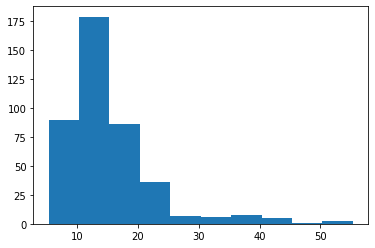

In [213]:
mpl.hist(dataset2['avginc'])

Distribution of Expenditure per Student 'expnstu' (variable 3 that I think is likely to have a relationship with average test score).  The amount of money spent on equipment, teaching resources, and other supplies should contribute to students' performance.

(array([ 12.,  38.,  93., 140.,  71.,  29.,  17.,   9.,   6.,   5.]),
 array([3926.06958008, 4304.61330566, 4683.15703125, 5061.70075684,
        5440.24448242, 5818.78820801, 6197.33193359, 6575.87565918,
        6954.41938477, 7332.96311035, 7711.50683594]),
 <a list of 10 Patch objects>)

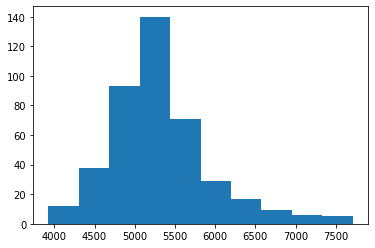

In [214]:
mpl.hist(dataset2['expnstu'])

## **1.2 Visualize the dependency of the target on each feature from 1.1**

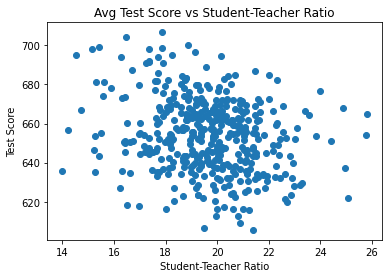

In [215]:
mpl.scatter(dataset2['str'],dataset2['testscr'])
mpl.xlabel('Student-Teacher Ratio')
mpl.ylabel('Test Score')
mpl.title('Avg Test Score vs Student-Teacher Ratio')
mpl.show()

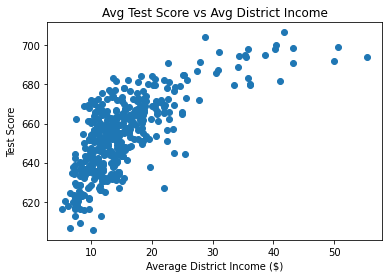

In [216]:
mpl.scatter(dataset2['avginc'],dataset2['testscr'])
mpl.xlabel('Average District Income ($)')
mpl.ylabel('Test Score')
mpl.title('Avg Test Score vs Avg District Income')
mpl.show()

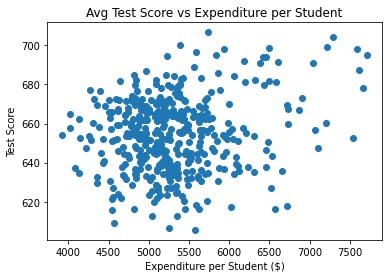

In [217]:
mpl.scatter(dataset2['expnstu'],dataset2['testscr'])
mpl.xlabel('Expenditure per Student ($)')
mpl.ylabel('Test Score')
mpl.title('Avg Test Score vs Expenditure per Student')
mpl.show()

## **1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California dataset and the target variable.  Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?**

> ### **Answer:** Under the default parameters, scaling the data with StandardScaler did not consistently improve my cross-validation scores. The scaled data improved the cross-validation mean scores for my KNN Regressor and Lasso models with the most notable improvement in my KNN Regressor (which initially yielded a negative score and ultimately increased to 0.48).  However, my Linear Regression and Ridge models' cross-validation mean score actually dropped when I scaled the data.

> ### When comparing improvements to test score perfromance, only the KNN Regressor model saw a significant improvement, whereas all my other models actually declined in their test scores.



Convert my categorical variables into dummy variables and remove any identical variables (like District and District Code)

In [218]:
y = dataset2['testscr'] #my y-variable
X = dataset2.loc[:, dataset2.columns != 'testscr'] #my x-variable (everything but test scores)
X = X.loc[:, X.columns != 'district'] #remove district since this is the same thing as my distcode

print("y shape:", y.shape)
print("X shape:", X.shape)
X['distcod'] = X['distcod'].astype('str') #convert district code as a string so that we can treat it as a dummy
data_dummies = pd.get_dummies(X)
print("Shape after including dummy variables", data_dummies.shape)

y shape: (420,)
X shape: (420, 13)
Shape after including dummy variables (420, 477)


In [219]:
X_altered = data_dummies #create a new variable for my dataset that includes dummy variables

In [220]:
print(X_altered.shape)
print(X_altered.columns)

(420, 477)
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct',
       ...
       'county_Stanislaus', 'county_Sutter', 'county_Tehama', 'county_Trinity',
       'county_Tulare', 'county_Tuolumne', 'county_Ventura', 'county_Yuba',
       'grspan_KK-06', 'grspan_KK-08'],
      dtype='object', length=477)


Train, test, split

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_altered, y, random_state = 40)

#review the training and test dimensions to confirm that my data set is the appropriate size
view_my_list = [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
print(view_my_list)

[(315, 477), (105, 477), (315,), (105,)]


Test various regression methods without scaling the data.  I have also pulled out the coefficients and intercepts so that I have a better understanding of the equation and coefficients that drives the relationship between my X and Y-variables.

In [222]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

ridge = Ridge().fit(X_train, y_train)
knnregressor = KNeighborsRegressor().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
linear_regression = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.04156818227057, tolerance: 11.296333086183617
  positive)


Ridge

In [223]:
#print("ridge.coef_: {}".format(ridge.coef_))
#I have this line of code to print all the coefficients; since I ran dummy variables, I've prevented it from printing since the list is long

print("ridge.intercept_: {}".format(ridge.intercept_))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))
print("Ridge Train Score: ",ridge.score(X_train, y_train))
print("Ridge Test Score: ",ridge.score(X_test, y_test))

ridge.intercept_: 666.1480348781353
Number of features used: 371
Ridge Train Score:  0.9595834427129011
Ridge Test Score:  0.8469683922235073


Lasso Regression

In [224]:
#print("\nlasso.coef_: {}".format(lasso.coef_))
#I have this line of code to print all the coefficients; since I ran dummy variables, I've prevented it from printing since the list is long

print("lasso.intercept_: {}".format(lasso.intercept_))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("Lasso Train Score: ", lasso.score(X_train, y_train))
print("Lasso Test Score: ", lasso.score(X_test, y_test))

lasso.intercept_: 657.6740867764361
Number of features used: 8
Lasso Train Score:  0.7975277591223691
Lasso Test Score:  0.8345467996104593


KNN Regressor

In [225]:
print("\nknnregressor - # of neighbors (default): {}".format(knnregressor.n_neighbors))
print("KNN Regressor Train Score: ",knnregressor.score(X_train, y_train))
print("KNN Regressor Test Score: ",knnregressor.score(X_test, y_test))


knnregressor - # of neighbors (default): 5
KNN Regressor Train Score:  0.3200977367503268
KNN Regressor Test Score:  0.03778894155792545


Linear Regression

In [226]:
#print("\nlinear_regression.coef_: {}".format(linear_regression.coef_))
#I have this line of code to print all the coefficients; since I ran dummy variables, I've prevented it from printing since the list is long

print("Number of features used: {}".format(np.sum(linear_regression.coef_ != 0)))
print("linear_regression.intercept_: {}".format(linear_regression.intercept_))
print("Linear Regression Train Score: ", linear_regression.score(X_train, y_train))
print("Linear Regression Test Score: ", linear_regression.score(X_test, y_test))

Number of features used: 444
linear_regression.intercept_: 666.3235882846657
Linear Regression Train Score:  1.0
Linear Regression Test Score:  0.8472490607084092


###**Cross validation scores for my unscaled models with default parameters**

In [227]:
#Print the default cross validation scores for each model
print("\nCV Training set scores:")
print("Ridge CV Mean Score: {:.2f}".format(np.mean(cross_val_score(Ridge(max_iter = 10000), X_train, y_train, cv = 10, scoring = "r2"))))
print("KNN Regressor CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv = 10, scoring = "r2"))))
print("Lasso CV Mean Score: {:.2f}".format(np.mean(cross_val_score(Lasso(max_iter = 10000), X_train, y_train, cv = 10, scoring = "r2"))))
print("Linear Regression CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv = 10, scoring = "r2"))))


CV Training set scores:
Ridge CV Mean Score: 0.78
KNN Regressor CV Mean Score: -0.06
Lasso CV Mean Score: 0.78
Linear Regression CV Mean Score: 0.77


###Scale the data using StandardScaler and rerun cross-validation






In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [229]:
ridge2 = Ridge().fit(X_scaled, y_train)
knnregressor2 = KNeighborsRegressor().fit(X_scaled, y_train)
lasso2 = Lasso().fit(X_scaled, y_train)
linear_regression2 = LinearRegression().fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

print("Ridge Train Score: ", ridge2.score(X_scaled, y_train))
print("KNN Regressor Train Score: ", knnregressor2.score(X_scaled, y_train))
print("Lasso Train Score: ", lasso2.score(X_scaled, y_train))
print("Linear Regression Train Score: ", linear_regression2.score(X_scaled, y_train))

print("\nRidge Test Score: ",ridge2.score(X_test_scaled, y_test))
print("KNN Regressor Test Score: ",knnregressor2.score(X_test_scaled, y_test))
print("Lasso Test Score: ", lasso2.score(X_test_scaled, y_test))
print("Linear Regression Test Score: ", linear_regression2.score(X_test_scaled, y_test))

Ridge Train Score:  0.99999772662578
KNN Regressor Train Score:  0.690323512385662
Lasso Train Score:  0.8222513411451491
Linear Regression Train Score:  1.0

Ridge Test Score:  0.7759798015861196
KNN Regressor Test Score:  0.5482531438498945
Lasso Test Score:  0.8167165584248488
Linear Regression Test Score:  0.7762443749641798


###**Cross Validation Scores for my scaled models with default parameters**

In [230]:
#Print a cross-validation mean score to evaluate the performance of various models
print("\nCV Training set scores:")
print("Ridge CV Mean Score: {:.2f}".format(np.mean(cross_val_score(Ridge(max_iter = 100000), X_scaled, y_train, scoring="r2"))))
print("KNN Regressor CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_scaled, y_train, scoring="r2"))))
print("Lasso CV Mean Score: {:.2f}".format(np.mean(cross_val_score(Lasso(max_iter = 100000), X_scaled, y_train, scoring="r2"))))
print("Linear Regression CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LinearRegression(), X_scaled, y_train, scoring="r2"))))


CV Training set scores:
Ridge CV Mean Score: 0.71
KNN Regressor CV Mean Score: 0.48
Lasso CV Mean Score: 0.79
Linear Regression CV Mean Score: 0.58


## **1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?**

> ### Yes, once I could tune the model parameters using GridSearchCV, the results improved or remained consistent relative to my original CV mean scores for my scaled models with default parameters. This is expected since I am able to hone and identify the parameters that generate better R2 scores.  As a breakdown of my methodology, I compared the cross-validation mean score from my previous results against the cross-validation mean score with the best parameter as identified by GridSearchCV.  Through this method, I found that my KNN Regressor observed improvements in mean R2 scoring while my Lasso and Ridge models' R2 score remained the same.

> ### Alternatively, when I compare the performance of models' test scores after tuning them to the best parameters identified by GridSearchCV, all three models' (which excludes the Linear Regression, since that cannot be tuned) test scores improved compared to the models with scaled data and default parameters.  Since the test score is the most important performance metric since it evaluates performance against unseen data, I can conclude that the results improved with GridSearchCV. 



Ridge GridSearchCV

In [231]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-100, -1, num = 99, base = 10)}

ridge_gridmodel = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
ridge_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(ridge_gridmodel.best_score_))
print("best parameters: {}".format(ridge_gridmodel.best_params_))
print("CV Mean Score with best params: {:.2f}".format(np.mean(cross_val_score(Ridge(**ridge_gridmodel.best_params_), X_scaled, y_train, scoring="r2"))))
print("test-set score: {:.3f}".format(ridge_gridmodel.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.716
best parameters: {'alpha': 1e-100}
CV Mean Score with best params: 0.71
test-set score: 0.776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KNN Regression GridSearchCV

In [232]:
param_grid = {'n_neighbors': np.arange(1, 51, 2)}

knnregressor_gridmodel = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
knnregressor_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(knnregressor_gridmodel.best_score_))
print("best parameters: {}".format(knnregressor_gridmodel.best_params_))
print("CV Mean Score with best params: {:.2f}".format(np.mean(cross_val_score(KNeighborsRegressor(**knnregressor_gridmodel.best_params_), X_scaled, y_train, scoring="r2"))))
print("test-set score: {:.3f}".format(knnregressor_gridmodel.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.562
best parameters: {'n_neighbors': 27}
CV Mean Score with best params: 0.56
test-set score: 0.570


Lasso GridSearchCV

In [233]:
param_grid = {'alpha': np.arange(0.2, 0.4, 0.0001)}

lassogridmodel = GridSearchCV(Lasso(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
lassogridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(lassogridmodel.best_score_))
print("best parameters: {}".format(lassogridmodel.best_params_))
print("CV Mean Score with best params: {:.2f}".format(np.mean(cross_val_score(Lasso(**lassogridmodel.best_params_), X_scaled, y_train, scoring="r2"))))
print("test-set score: {:.3f}".format(lassogridmodel.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.782
best parameters: {'alpha': 0.34329999999998423}
CV Mean Score with best params: 0.79
test-set score: 0.827


##**1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?**

### Ridge and Lasso had the best test set scores, so these are the two linear models that I filtered onto.  I judged features to be important based on whether or not they were equal to zero.  They didn't completely agree on the features, as Ridge found 371 features that were important whereas my Lasso model found 147.  This is expected since Lasso uses L1 penalization, which  works better for models that have lots of features but only some of them are supposed to be important.

### Overall, there were 147 common features that were considered important. Circling back to the three explanatory variables that I thought would have a relationship with the target feature, all three appear in the common features of my final Ridge and Lasso models, .

In [234]:
ridge3 = Ridge(**ridge_gridmodel.best_params_).fit(X_scaled, y_train)
lasso3 = Lasso(**lassogridmodel.best_params_).fit(X_scaled, y_train)

print("Ridge Test Score: ", ridge3.score(X_test_scaled, y_test))
print("Lasso Test Score: ", lasso3.score(X_test_scaled, y_test))
print("Linear Regression Test Score: ", linear_regression2.score(X_test_scaled, y_test))

Ridge Test Score:  0.7762443749641807
Lasso Test Score:  0.8265270738275707
Linear Regression Test Score:  0.7762443749641798


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [235]:
#create data frame of the coefficients from my 2 best models with scaled data
all_coeff_ridge = pd.DataFrame(ridge3.coef_)
all_coeff_lasso = pd.DataFrame(lasso3.coef_)

#list all the features that were included in the model
all_features = pd.DataFrame(X_altered.columns)

#list the coefficients that were higher than the mean coefficient of each model
imp_features_ridge = all_features[all_coeff_ridge != 0]
imp_features_lasso = all_features[all_coeff_lasso != 0]

#filter the list
ridge_filtered = imp_features_ridge[imp_features_ridge[0].notnull()]
lasso_filtered = imp_features_lasso[imp_features_lasso[0].notnull()]

#rename the column
ridge_filtered.columns = ['features']
lasso_filtered.columns = ['features']

common_features = ridge_filtered.merge(lasso_filtered, how = 'inner', on = 'features')

In [236]:
print(common_features)

print("\nRidge coefficients: ", ridge_filtered.size,
      "\nLasso coefficients: ", lasso_filtered.size,
      "\nCommon Features: ", common_features.size)

            features
0            enrltot
1            mealpct
2            compstu
3            expnstu
4                str
..               ...
142   county_Trinity
143  county_Tuolumne
144      county_Yuba
145     grspan_KK-06
146     grspan_KK-08

[147 rows x 1 columns]

Ridge coefficients:  371 
Lasso coefficients:  147 
Common Features:  147


## **1.6 Discuss which final model you would choose to predict new data**

### I would choose the Lasso model to predict new data. Using my best parameters, my Lasso model yielded a better R2 score on my test data of 0.827 compared to my Ridge R2 score 0.776 (slightly higher than my linear regression).

### In addition, Lasso, which uses L1 regularization, is particularly effective in identifying select variables of importance when presented with a large list.  Since I included dummy variables in my model, which yielded 477 original variables, it is helpful that Lasso yields a sparse model to help eliminate variables that do not materially contribute to the target variable.


# Part 2: Classification

Preparing my data for analysis

In [237]:
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
white_wine['winetype'] = 0
white_wine.size

63674

In [238]:
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
red_wine['winetype'] = 1
red_wine.size

20787

In [239]:
wine_list = pd.concat([white_wine, red_wine])
wine_list.size == red_wine.size + white_wine.size #confirm that the size matches what we expect

True

In [240]:
y_wine = wine_list['winetype'] #my y-variable
X_wine = wine_list.loc[:, wine_list.columns != 'winetype'] #my x-variable (everything but test scores)

print("y_wine shape:", y_wine.shape)
print("X_wine shape:", X_wine.shape)

y_wine shape: (6497,)
X_wine shape: (6497, 12)


In [241]:
wine_list.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype'],
      dtype='object')

In [242]:
X_wine.head(10) #let's look at our data set to see if we have any categorical variables that we need to change; I chose to leave Quality as a continuous variable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## **2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.**

(array([  63., 1151., 3248., 1339.,  382.,  177.,   82.,   41.,    7.,
           7.]),
 array([ 3.8 ,  5.01,  6.22,  7.43,  8.64,  9.85, 11.06, 12.27, 13.48,
        14.69, 15.9 ]),
 <a list of 10 Patch objects>)

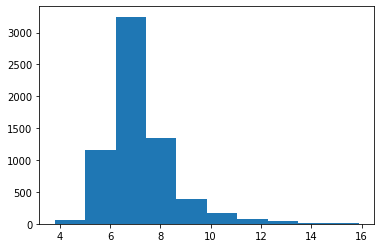

In [243]:
mpl.hist(wine_list['fixed acidity'])

(array([  16.,  334., 1233., 2111., 1663.,  802.,  263.,   59.,   12.,
           4.]),
 array([2.72 , 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.752,
        3.881, 4.01 ]),
 <a list of 10 Patch objects>)

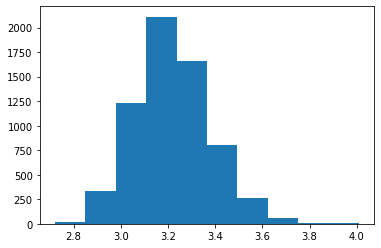

In [244]:
mpl.hist(wine_list['pH'])

(array([1.088e+03, 9.790e+02, 2.049e+03, 1.514e+03, 7.210e+02, 1.340e+02,
        8.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  6. ,  49.4,  92.8, 136.2, 179.6, 223. , 266.4, 309.8, 353.2,
        396.6, 440. ]),
 <a list of 10 Patch objects>)

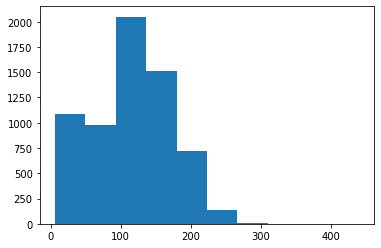

In [245]:
mpl.hist(wine_list['total sulfur dioxide'])

## **2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the data set and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?**

> ### The results improved after I scaled using StandardScaler, especially my KNN Classifier, whose mean cross validation score increased from 0.94 to 0.99.

> ### Beyond the CV mean scores, the accuracy test scores for all three models also improved once I scaled the data with StandardScaler.  The largest improvement occurred in KNN Classification.

In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, random_state = 40)

#review the training and test dimensions to confirm that my data set is the appropriate size
view_my_list = [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
print(view_my_list)

[(4872, 12), (1625, 12), (4872,), (1625,)]


Knn Classifier

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)

print("KNN Classifier Test Score: ", knn_classifier.score(X_test, y_test))

KNN Classifier Test Score:  0.940923076923077


Logistic Regression (no penalty)

In [248]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(penalty='none', max_iter = 10000).fit(X_train, y_train)

print("logistic_regression.coef_: {}".format(logistic_regression.coef_))
print("logistic_regression.intercept_: {}".format(logistic_regression.intercept_))
print("Number of features used: {}".format(np.sum(logistic_regression.coef_ != 0)))
print("Logistic Regression Test Score: ", logistic_regression.score(X_test, y_test))

logistic_regression.coef_: [[  1.50657303  12.81078716  -0.5262792   -0.07203927  38.46186029
    0.06280919  -0.07246361 -22.44452395  10.22323576   8.55377074
   -0.42576179   0.16754752]]
logistic_regression.intercept_: [-26.35131888]
Number of features used: 12
Logistic Regression Test Score:  0.9852307692307692


Logistic Regression (default l2 Penalty)

In [249]:
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear').fit(X_train, y_train)

print("logistic_regression_l2.coef_: {}".format(logistic_regression_l2.coef_))
print("logistic_regression_l2.intercept_: {}".format(logistic_regression_l2.intercept_))
print("Number of features used: {}".format(np.sum(logistic_regression_l2.coef_ != 0)))
print("Logistic Regresion L2 Test Score: ", logistic_regression_l2.score(X_test, y_test))

logistic_regression_l2.coef_: [[ 0.70175114  8.22197148 -0.77122507 -0.14764468  2.12940347  0.04995036
  -0.06517805 -2.53551609  2.11717464  6.38325319 -0.83840905 -0.06564089]]
logistic_regression_l2.intercept_: [-2.75122359]
Number of features used: 12
Logistic Regresion L2 Test Score:  0.9735384615384616


Model scores before scaling

In [250]:
#Print the default cross validation scores for each model
print("Training set CV scores:")
print("KNN Classifier CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring="accuracy"))))
print("Logistic Regression CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter = 10000), X_train, y_train, scoring="accuracy"))))
print("Logistic Regression Penalty CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2', solver='liblinear'), X_train, y_train, scoring="accuracy"))))

Training set CV scores:
KNN Classifier CV Mean Score: 0.94
Logistic Regression CV Mean Score: 0.99
Logistic Regression Penalty CV Mean Score: 0.98


Now, I scale my training and test data and rerun my models

In [251]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

Test and Train Scores for each of my scaled models

In [252]:
knn_classifier_scaled = KNeighborsClassifier().fit(X_scaled, y_train)
logistic_regression_scaled = LogisticRegression(penalty = 'none').fit(X_scaled, y_train)
logistic_regression_penalty_scaled = LogisticRegression(penalty='l2', solver='liblinear').fit(X_scaled, y_train)

print("KNN Classifier Test Score: ",knn_classifier_scaled.score(X_test_scaled, y_test))
print("Logistic Regression (no penalty) Test Score: ",logistic_regression_scaled.score(X_test_scaled, y_test))
print("Logistic Regression (L2 Penalty) Test Score: ", logistic_regression_penalty_scaled.score(X_test_scaled, y_test))

print("\nKNN Classifier Train Score: ", knn_classifier_scaled.score(X_scaled, y_train))
print("Logistic Regression (no penalty) Train Score: ", logistic_regression_scaled.score(X_scaled, y_train))
print("Logistic Regression (L2 Penalty) Train Score: ", logistic_regression_penalty_scaled.score(X_scaled, y_train))

KNN Classifier Test Score:  0.992
Logistic Regression (no penalty) Test Score:  0.992
Logistic Regression (L2 Penalty) Test Score:  0.992

KNN Classifier Train Score:  0.9948686371100164
Logistic Regression (no penalty) Train Score:  0.9946633825944171
Logistic Regression (L2 Penalty) Train Score:  0.9950738916256158


Cross Val Scores for my scaled models

In [253]:
#Print the default cross validation scores for each model
print("Training set scores:")
print("KNN Classifier CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_scaled, y_train, scoring="accuracy"))))
print("Logistic Regression CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none'), X_scaled, y_train, scoring="accuracy"))))
print("Logistic Regression Penalty CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2', solver='liblinear'), X_scaled, y_train, scoring="accuracy"))))

Training set scores:
KNN Classifier CV Mean Score: 0.99
Logistic Regression CV Mean Score: 0.99
Logistic Regression Penalty CV Mean Score: 0.99


## **2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?**



> ### Yes, the test score improved by 0.001 in accuracy for the KNN Classifier and Penalized Logistic Regression once I applied the best parameters found by GridSearchCV.  With the mean cross-validation scores, the KNN classifier accuracy improved from 0.94 to 0.99, while the Logistic Regression with penalty maintained the same accuracy score after GridSearchCV.






**Logistic Regression (no penalty) GridSearchCV:** I did not run GridSearchCV on my Logistic Regression where penalty = 'none' because the error message from Python said that I cannot adjust C if my penalty is set to none.

**Penalty Logistic Regression GridSearchCV**

In [254]:
param_grid = {'C': np.logspace(-10, 10, base = 10), 'penalty': ['l1','l2']}
#i chose not to include elasticnet to ensure convergence

#chose to use liblinear as solver since it allows l1 and l2 penalties to ensure convergence
pen_logreg_gridmodel = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
pen_logreg_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(pen_logreg_gridmodel.best_score_))
print("best parameters: {}".format(pen_logreg_gridmodel.best_params_))
print("CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(solver = 'liblinear', **pen_logreg_gridmodel.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(pen_logreg_gridmodel.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.995
best parameters: {'C': 0.6250551925273976, 'penalty': 'l1'}
CV Mean Score: 0.99
test-set score: 0.994


**KNN Classifier GridSearchCV**

In [255]:
param_grid = {'n_neighbors': np.arange(1, 30, 1)}

knn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
knn_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel.best_score_))
print("best parameters: {}".format(knn_gridmodel.best_params_))
print("CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
CV Mean Score: 0.99
test-set score: 0.993


## **2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?**



> ### To answer this question, I will begin with rerunning my three models (KNN Classifier, Logistic Regression w/ and w/o penalty), converting them from stratified kfold to 'kfold with shuffling' to determine any changes in scores and best parameters.  Afterwards, I will change the seed to determine if there are any changes when shuffling; there were no changes to my parameters or mean scores though there were some slight differences in individual GridSearchCV scores.  I did not run the Logistic Regression with no penalty since I cannot alter the C parameter when the penalty is set to 'none'.

> ### Through my results, I observed that shuffling altered my parameters for KNN Classification and Logistic Regression.   Employing stratified kfold, it found the best n_neighbors to be 1, while shuffled k-fold led to an optimal neighbor count of 12.  The best C parameter for my Penalized Logistic Regression were also different (0.625 vs 0.244) between the stratified and shuffled k-fold methods. For the KNN Classifier and Penalized Logistic Regression, stratified kfold actually yielded slightly (0.001) better mean cross-validation and test scores.

> ### In selecting a different seed for kfold shuffling, I noticed different ideal parameters for my Penalized Logistic Regression; the best penalty parameter actually changed from l1 to l2.  The accuracy test scores and the mean cross-validation scores also changed when I selected a different seed: my KNN Classifier's test score improved while the Penalized Logistic Regression's test score fell.

> ### When choosing a different seed for train_test_split, it did not change the performance of my models in their mean cross-validation score or their test scores.  The best parameters found by GridSearchCV also did not change.



KNN Classifier - KFold with Shuffling vs Stratified KFold Analysis

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
import numpy as np

skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

param_grid = {'n_neighbors': np.arange(1, 30, 1)}

#set up GridSearchCV to compare stratified kfold and k-fold
knn_skfold_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
knn_shuffle_kfold_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)

#use meta model methods to fit score and predict model:
knn_skfold_gridmodel.fit(X_scaled, y_train)
knn_shuffle_kfold_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("KNN SKFold best mean cross-validation score: {:.3f}".format(knn_skfold_gridmodel.best_score_))
print("KNN KFold best mean cross-validation score: {:.3f}".format(knn_shuffle_kfold_gridmodel.best_score_))

print("\nbest parameters: {}".format(knn_skfold_gridmodel.best_params_))
print("best parameters: {}".format(knn_shuffle_kfold_gridmodel.best_params_))

print("\nStratifiedKFold:\n{}".format(cross_val_score(KNeighborsClassifier(**knn_skfold_gridmodel.best_params_), X_scaled, y_train, cv=skfold, scoring = "accuracy")))
print("KFold:\n{}".format(cross_val_score(KNeighborsClassifier(**knn_shuffle_kfold_gridmodel.best_params_), X_scaled, y_train, cv=kfold, scoring = "accuracy")))

print("\nStratified KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_skfold_gridmodel.best_params_), X_scaled, y_train, cv = skfold, scoring="accuracy"))))
print("Shuffled KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_shuffle_kfold_gridmodel.best_params_), X_scaled, y_train, cv = kfold, scoring="accuracy"))))

print("\nStratified KFold test-set score: {:.3f}".format(knn_skfold_gridmodel.score(X_test_scaled, y_test)))
print("Shuffled KFold test-set score: {:.3f}".format(knn_shuffle_kfold_gridmodel.score(X_test_scaled, y_test)))

KNN SKFold best mean cross-validation score: 0.994
KNN KFold best mean cross-validation score: 0.993

best parameters: {'n_neighbors': 1}
best parameters: {'n_neighbors': 12}

StratifiedKFold:
[0.99795082 0.99590164 0.98973306 0.99383984 0.99178645 0.99383984
 0.99589322 0.99383984 0.99383984 0.99383984]
KFold:
[0.99180328 0.99795082 0.98562628 0.99794661 0.99383984 0.99383984
 0.99383984 0.98973306 0.99383984 0.99589322]

Stratified KFold CV Mean Score: 0.99
Shuffled KFold CV Mean Score: 0.99

Stratified KFold test-set score: 0.993
Shuffled KFold test-set score: 0.991


Logistic Regression (with penalty) - KFold with Shuffling vs Stratified KFold Analysis


In [257]:
skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

param_grid = {'C': np.logspace(-10, 10, base = 10), 'penalty': ['l1','l2']}

#set up GridSearchCV to compare stratified kfold and k-fold
logreg_skfold_gridmodel = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid=param_grid, cv=skfold)
logreg_shuffle_kfold_gridmodel = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid=param_grid, cv=kfold)

#use meta model methods to fit score and predict model:
logreg_skfold_gridmodel.fit(X_scaled, y_train)
logreg_shuffle_kfold_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("LogReg SKFold best mean cross-validation score: {:.3f}".format(logreg_skfold_gridmodel.best_score_))
print("LogReg KFold best mean cross-validation score: {:.3f}".format(logreg_shuffle_kfold_gridmodel.best_score_))

print("\nbest parameters: {}".format(logreg_skfold_gridmodel.best_params_))
print("best parameters: {}".format(logreg_shuffle_kfold_gridmodel.best_params_))

print("StratifiedKFold:\n{}".format(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_skfold_gridmodel.best_params_), X_scaled, y_train, cv=skfold, scoring = "accuracy")))
print("KFold:\n{}".format(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_shuffle_kfold_gridmodel.best_params_), X_scaled, y_train, cv=kfold, scoring = "accuracy")))

print("Stratified KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_skfold_gridmodel.best_params_), X_scaled, y_train, cv = skfold, scoring="accuracy"))))
print("Shuffled KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_shuffle_kfold_gridmodel.best_params_), X_scaled, y_train, cv = kfold, scoring="accuracy"))))

print("\nStratified KFold test-set score: {:.3f}".format(logreg_skfold_gridmodel.score(X_test_scaled, y_test)))
print("Shuffled KFold test-set score: {:.3f}".format(logreg_shuffle_kfold_gridmodel.score(X_test_scaled, y_test)))

LogReg SKFold best mean cross-validation score: 0.995
LogReg KFold best mean cross-validation score: 0.994

best parameters: {'C': 0.6250551925273976, 'penalty': 'l1'}
best parameters: {'C': 0.2442053094548655, 'penalty': 'l1'}
StratifiedKFold:
[0.99795082 0.99795082 0.98973306 0.99178645 0.99589322 0.99383984
 0.99589322 0.99589322 0.99383984 0.99383984]
KFold:
[0.99180328 0.99590164 0.99178645 0.99794661 0.99589322 0.99589322
 0.99589322 0.98767967 0.99794661 0.99383984]
Stratified KFold CV Mean Score: 0.99
Shuffled KFold CV Mean Score: 0.99

Stratified KFold test-set score: 0.994
Shuffled KFold test-set score: 0.993


Try a different seed to see how results differ when shuffling.

In [258]:
#use random_state = 30 instead of 50
kfold = KFold(n_splits=10, shuffle=True, random_state = 30)

#set up parameters for evaluation
knn_param_grid = {'n_neighbors': np.arange(1, 30, 1)}
logreg_param_grid = {'C': np.logspace(-10, 10, base = 10), 'penalty': ['l1','l2']}

#set up gridsearchcv
knn_shuffle_kfold_gridmodel2 = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=kfold)
logreg_shuffle_kfold_gridmodel2 = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid=logreg_param_grid, cv=kfold)

#use meta model methods to fit score and predict model:
knn_shuffle_kfold_gridmodel2.fit(X_scaled, y_train)
logreg_shuffle_kfold_gridmodel2.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("KNN Shuffle KFold best mean cross-validation score: {:.3f}".format(knn_shuffle_kfold_gridmodel2.best_score_))
print("LogReg Shuffle KFold best mean cross-validation score: {:.3f}".format(logreg_shuffle_kfold_gridmodel2.best_score_))

print("\nKNN Shuffle KFold:\n{}".format(cross_val_score(KNeighborsClassifier(**knn_shuffle_kfold_gridmodel2.best_params_), X_scaled, y_train, cv=kfold, scoring = "accuracy")))
print("LogReg Shuffle KFold:\n{}".format(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_shuffle_kfold_gridmodel2.best_params_), X_scaled, y_train, cv=kfold, scoring = "accuracy")))

print("\nKNN best parameters: {}".format(knn_shuffle_kfold_gridmodel2.best_params_))
print("LogReg best parameters: {}".format(logreg_shuffle_kfold_gridmodel2.best_params_))

print("\nKNN Statified KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_shuffle_kfold_gridmodel2.best_params_), X_scaled, y_train, cv = skfold, scoring="accuracy"))))
print("LogReg Statified KFold CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(solver = 'liblinear', **logreg_shuffle_kfold_gridmodel2.best_params_), X_scaled, y_train, cv = kfold, scoring="accuracy"))))

print("\nKNN Shuffled KFold test-set score: {:.3f}".format(knn_shuffle_kfold_gridmodel2.score(X_test_scaled, y_test)))
print("LogReg Shuffled KFold test-set score: {:.3f}".format(logreg_shuffle_kfold_gridmodel2.score(X_test_scaled, y_test)))

KNN Shuffle KFold best mean cross-validation score: 0.994
LogReg Shuffle KFold best mean cross-validation score: 0.994

KNN Shuffle KFold:
[0.99795082 0.99385246 0.99589322 0.99383984 0.99589322 0.99589322
 0.99383984 0.98973306 0.99178645 0.99383984]
LogReg Shuffle KFold:
[0.9897541  1.         0.99178645 0.99383984 0.99589322 0.99383984
 0.99794661 0.9835729  0.99383984 0.99589322]

KNN best parameters: {'n_neighbors': 1}
LogReg best parameters: {'C': 0.2442053094548655, 'penalty': 'l2'}

KNN Statified KFold CV Mean Score: 0.99
LogReg Statified KFold CV Mean Score: 0.99

KNN Shuffled KFold test-set score: 0.993
LogReg Shuffled KFold test-set score: 0.991


Now I will try a different random state seed for my train_test_split to see if it yields different results.

In [259]:
from sklearn.model_selection import train_test_split

X_train_newseed, X_test_newseed, y_train_newseed, y_test_newseed = train_test_split(X_wine, y_wine, random_state = 10)

scaler = StandardScaler()
scaler.fit(X_train_newseed)
X_scaled_newseed = scaler.transform(X_train_newseed)

X_test_scaled_newseed = scaler.transform(X_test_newseed)

knn_classifier_scaled = KNeighborsClassifier().fit(X_scaled, y_train)
logistic_regression_penalty_scaled = LogisticRegression(penalty='l2', solver='liblinear').fit(X_scaled, y_train)
logistic_regression_scaled = LogisticRegression(penalty = 'none').fit(X_scaled, y_train)

print("New Seed - KNN Classifier Test Score: ",knn_classifier_scaled.score(X_test_scaled, y_test))
print("New Seed - Logistic Regression (no penalty) Test Score: ",logistic_regression_scaled.score(X_test_scaled, y_test))
print("New Seed - Logistic Regression (L2 Penalty) Test Score: ", logistic_regression_penalty_scaled.score(X_test_scaled, y_test))

print("\nNew Seed - KNN Classifier Train Score: ", knn_classifier_scaled.score(X_scaled, y_train))
print("New Seed - Logistic Regression (no penalty) Train Score: ", logistic_regression_scaled.score(X_scaled, y_train))
print("New Seed - Logistic Regression (L2 Penalty) Train Score: ", logistic_regression_penalty_scaled.score(X_scaled, y_train))

New Seed - KNN Classifier Test Score:  0.992
New Seed - Logistic Regression (no penalty) Test Score:  0.992
New Seed - Logistic Regression (L2 Penalty) Test Score:  0.992

New Seed - KNN Classifier Train Score:  0.9948686371100164
New Seed - Logistic Regression (no penalty) Train Score:  0.9946633825944171
New Seed - Logistic Regression (L2 Penalty) Train Score:  0.9950738916256158


KNN Classification - with the new train_test_split seed

In [260]:
print("KNN Classification with Penalties - New Seed")

param_grid = {'n_neighbors': np.arange(1, 30, 1)}

knn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
knn_gridmodel.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel.best_score_))
print("best parameters: {}".format(knn_gridmodel.best_params_))
print("CV Mean Score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel.score(X_test_scaled, y_test)))

KNN Classification with Penalties - New Seed
best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 1}
CV Mean Score: 0.99
test-set score: 0.993


Logistic Regression with Penalties - with the new train_test_split seed

In [261]:
print("Logistic Regression with Penalties - New Seed")

param_grid = {'C': np.logspace(-10, 10, base = 10), 'penalty': ['l1','l2']}
#i chose not to include elasticnet to ensure convergence

#chose to use liblinear as solver since it allows l1 and l2 penalties to ensure convergence
pen_logreg_gridmodel3 = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
pen_logreg_gridmodel3.fit(X_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("New Seed - best mean cross-validation score: {:.3f}".format(pen_logreg_gridmodel3.best_score_))
print("New Seed - best parameters: {}".format(pen_logreg_gridmodel3.best_params_))
print("New Seed - CV Mean Score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(solver = 'liblinear', **pen_logreg_gridmodel3.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("New Seed - test-set score: {:.3f}".format(pen_logreg_gridmodel3.score(X_test_scaled, y_test)))

Logistic Regression with Penalties - New Seed
New Seed - best mean cross-validation score: 0.994
New Seed - best parameters: {'C': 0.6250551925273976, 'penalty': 'l1'}
New Seed - CV Mean Score: 0.99
New Seed - test-set score: 0.994


## **2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.**

> ### In evaluating the various coefficients between the non-penalized and penalized logistic regression, the coefficients are similar in terms of the positive/negative signs and the values are quite close together.  None of the coefficients are very close to zero.

> ### I would choose the Penalized Logistic Regression over the Logistic Regression to predict data.  A major driver in my reasoning is the Penalized Logistic Regression's ability to use GridSearchCV to find the best parameters to improve the test score accuracy (which is the most important metric).  Since a Logistic Regression where the penalty is set to none cannot have the C-value adjusted (which determines the weighting of the penalties), we lack sufficient flexibility to alter parameters that might improve our model performance.  When we can optimize parameters, we indeed yield better test scores, evident below where the Penalized Logistic Regression yields a test score of 0.994, while the Logistic Regression with and without penalties set to default parameters only yield a 0.992 accuracy score.

In [262]:
#For the purposes of my argument about which type of Logistic Regression is ideal, I need to run a Penalized
#Logistic Regression model that incorporates the best parameters from GridSearchCV
logreg_with_bestparams = LogisticRegression(solver = "liblinear", **pen_logreg_gridmodel.best_params_).fit(X_scaled, y_train)

#Identify the coefficients
print("Logistic Regression (no penalty, no GridSearchCV) Coefficients: ", logistic_regression_scaled.coef_)
print("\nPenalized Logistic Regression (no GridSearchCV) Coefficients: ", logistic_regression_penalty_scaled.coef_)
print("\nPenalized Logistic Regression (with GridSearchCV with parameters) Coefficients: ", logreg_with_bestparams.coef_)

#Identify best scores
print("\nLogReg test-set score (without GridSearchCV): {:.3f}".format(logistic_regression_scaled.score(X_test_scaled, y_test)))
print("Penalized LogReg test-set score (without GridSearchCV): {:.3f}".format(logistic_regression_penalty_scaled.score(X_test_scaled, y_test)))
print("Penalized LogReg test-set score (with GridSearchCV parameters): {:.3f}".format(logreg_with_bestparams.score(X_test_scaled, y_test)))

Logistic Regression (no penalty, no GridSearchCV) Coefficients:  [[ 0.10602193  1.24871537 -0.38794936 -4.20229338  0.99269865  1.26363999
  -3.33097033  4.52237408  0.12336125  0.54917263  1.59109273  0.3560238 ]]

Penalized Logistic Regression (no GridSearchCV) Coefficients:  [[ 0.51049139  1.27364702 -0.32844997 -2.70958719  0.96903133  0.8684229
  -2.91542925  3.12527614  0.44775437  0.62712811  0.92991097  0.32352519]]

Penalized Logistic Regression (with GridSearchCV with parameters) Coefficients:  [[ 0.13531502  1.21449516 -0.2915767  -3.36385083  0.88999408  0.91294289
  -2.97365978  3.86024169  0.20703025  0.55665497  1.21956112  0.3233836 ]]

LogReg test-set score (without GridSearchCV): 0.992
Penalized LogReg test-set score (without GridSearchCV): 0.992
Penalized LogReg test-set score (with GridSearchCV parameters): 0.994
